In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')
print("Head:\n", df.head())
print("\nTail:\n", df.tail())

Head:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Tail:
         TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [3]:
print("Shape:", df.shape)
print("\nInformation of the dataset:\n")
print(df.info())

Shape: (200, 4)

Information of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


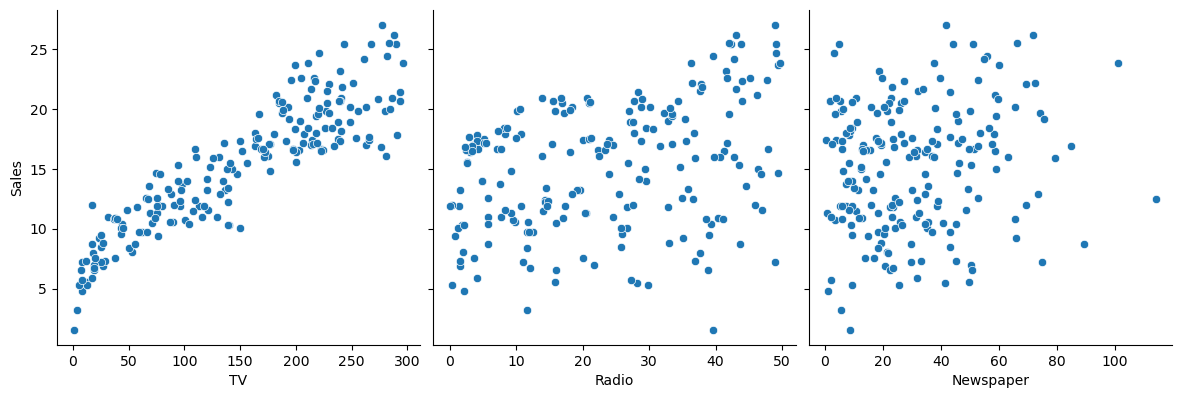

In [4]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=4, aspect=1)
plt.show()

In [5]:
print("Correlation Matrix:")
print(df.corr())

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


# TV has `90%` correlation with Sales #
So TV is the only considerable feature compared to others

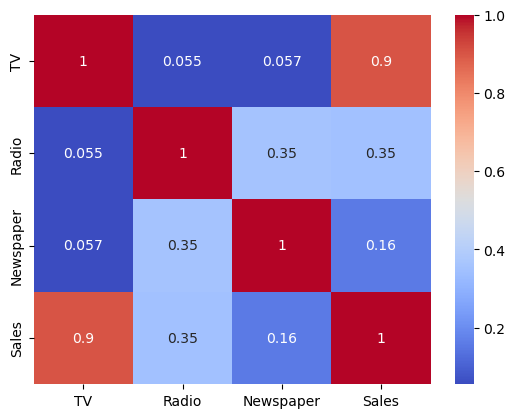

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
X = df['TV']
y = df['Sales']

print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64
(200,)
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
(200,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [9]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Coefficient (w1) :", lm.coef_)
print("Intercept (w0) :", lm.intercept_)

Coefficient (w1) : [0.05483488]
Intercept (w0) : 7.206554548173255


$y = 0.054 * TV + 7.206$

In [12]:
y_pred = lm.predict(X_test)
y_pred

array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
       11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
        8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
       16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
       19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
       10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
       18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
       20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
       13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
        9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
       11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
       14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759])

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2_score, ", Percentage:", r2_score * 100, "%")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 score: 0.814855389208679 , Percentage: 81.4855389208679 %
Mean Squared Error: 5.179525402166653
Root Mean Squared Error: 2.2758570698017597
Mean Absolute Error: 1.806912377664152


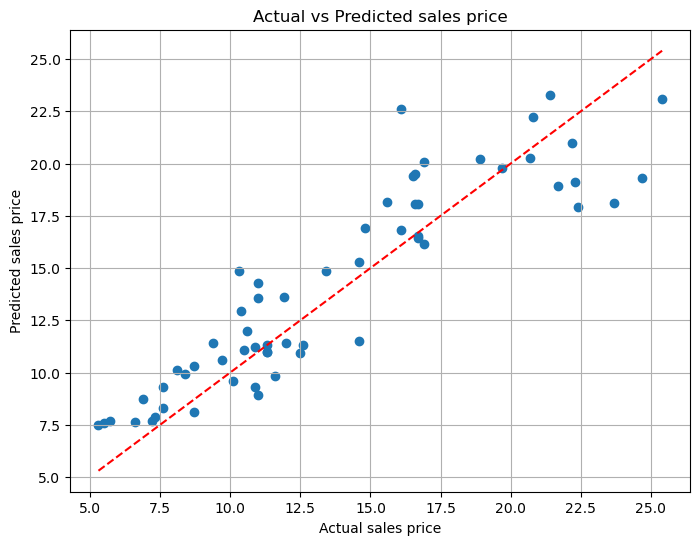

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual sales price")
plt.ylabel("Predicted sales price")
plt.title("Actual vs Predicted sales price")
plt.grid(True)
plt.show()